In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point

<IPython.core.display.Javascript object>


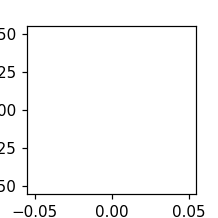

In [19]:
%matplotlib notebook
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

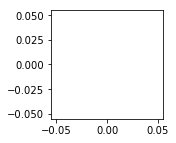

In [3]:
%matplotlib inline
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

In [2]:
dfmg = pd.read_csv("dfmg_glDist.csv")
del dfmg['Unnamed: 0']
dfmg.loc[:,'JULD'] = pd.to_datetime(dfmg.loc[:, 'JULD'])

In [3]:
import plot_stations as pltStn
import importlib
importlib.reload(pltStn)

<module 'plot_stations' from '/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_stations.py'>

In [4]:
import plot_bathy as pltBathy
import importlib
importlib.reload(pltBathy)

<module 'plot_bathy' from '/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_bathy.py'>

In [5]:
import find_depth_averages_v2 as averageProfile
import plot_var_contours_with_distance as plt2dDepthVsDist

In [6]:
WSO_source = (dfmg['CTEMP'] <= -1.7 ) & (dfmg["PSAL_ADJUSTED"] > 34.5)
WSO_prod = (dfmg['CTEMP'] <= -0.8) & (dfmg['CTEMP'] >= -1.2) & (dfmg["PSAL_ADJUSTED"] > 34.5)

len(dfmg.loc[WSO_prod, 'PROFILE_NUMBER'].unique())

7270

In [7]:
import plot_station_bot_sal as pbs

In [8]:
def sel_months(df, months=[1]):
    return df['JULD'].dt.month.isin(months)

In [9]:
def get_mask_from_prof_mask(df, profmask):
    profs = dfmg.loc[profmask, 'PROFILE_NUMBER'].unique()
    mask = dfmg.loc[:, 'PROFILE_NUMBER'].isin(profs)
    
    return mask

In [10]:
box1 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box2 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)
box3 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box4 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)

box5 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box6 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)
box7 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box8 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)

box9 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 60) & (dfmg["LONGITUDE"] < 70)
box10 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 80)

In [11]:
Weddell = (box1 | box2 | box3| box4)
Ross = (box5 | box6 | box7 | box8)
Prydz = (box9 | box10)
EBS = (dfmg['LONGITUDE'] > -80) & (dfmg['LONGITUDE'] < -60) #Eastern Bellingshausen Sea
WBS = (dfmg['LONGITUDE'] > -100) & (dfmg['LONGITUDE'] < -80) # Western Bellingshausen Sea

In [12]:
dfmg['mab'] = abs(dfmg['ECHODEPTH'] - dfmg['DEPTH'])
lt60 = abs(dfmg['mab']) < 60
lt100 = abs(dfmg['mab']) < 100
lt200 = abs(dfmg['mab']) < 200

In [13]:
lowSurfSal = (dfmg['PSAL_ADJUSTED'] < 33.5) & (dfmg['DEPTH'] > -100)
cdw = (dfmg['PSAL_ADJUSTED'] > 34.6) & (dfmg['CTEMP'] > 0)
maxTemp = (dfmg.groupby('PROFILE_NUMBER')['CTEMP'].transform(max) == dfmg['CTEMP'])
gline_le_50km = dfmg['DIST_GLINE'] <= 50
gline_le_100km = dfmg['DIST_GLINE'] <= 100
gline_le_150km = dfmg['DIST_GLINE'] <= 150
gline_le_25km = dfmg['DIST_GLINE'] <= 25

In [14]:
def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))
play_beep()

(-90.0, -53.13010235415599)


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


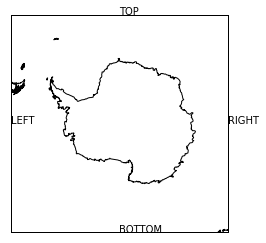

In [320]:
lat0 = -90
lon0 = 0
m1 = Basemap(projection='ortho', lat_0 =lat0, lon_0 =lon0, resolution='l');
width = m1.urcrnrx - m1.llcrnrx
height = m1.urcrnry - m1.llcrnry
m  = Basemap(projection='ortho', lat_0=lat0, lon_0=lon0, resolution='l', 
             llcrnrx=-width*0.30, llcrnry=-0.30*height, urcrnrx=0.30*width, urcrnry=0.30*height)
width = m.urcrnrx - m.llcrnrx
height = m.urcrnry - m.llcrnry
m.drawmapboundary()
m.drawcoastlines()

plt.text(m.llcrnrx, m.llcrnry+height*0.5, "LEFT")
plt.text(m.urcrnrx, m.urcrnry-height*0.5, "RIGHT")
plt.text(m.llcrnrx+width*0.5, m.llcrnry, "BOTTOM")
plt.text(m.llcrnrx+width*0.5, m.urcrnry, "TOP")
left = [m.llcrnrx, m.llcrnry+height*0.5]
print(m(left[0], left[1], inverse=True))
plt.show()

In [386]:
m = topView.createMapProjections(-90, 0, region='Whole')
topView.getCellSize(m)

Horizontal distance =  8199.491128244028 
 Vertical distance =  8199.491128244028


In [15]:
import plot_topView_contourf as topView
importlib.reload(topView)

<module 'plot_topView_contourf' from '/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_topView_contourf.py'>

In [17]:
import plot_monthly_count as monthCount
importlib.reload(monthCount)

<module 'plot_monthly_count' from '/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_monthly_count.py'>

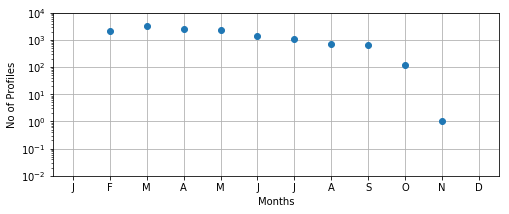

In [20]:
monthCount.time_vs_count(dfmg[Weddell], show=True)

0 0


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_monthly_count.py:60: RuntimeWarning: invalid value encountered in true_divide
  rects_source = ax_sp.bar(np.arange(12)+wd, nprof_source/nprof_all*100, wd, color='r', label='source')
/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_monthly_count.py:61: RuntimeWarning: invalid value encountered in true_divide
  rects_prod = ax_sp.bar(np.arange(12)+wd*2, nprof_prod/nprof_all*100, wd, color='b', label='prod')


0 1
0 2


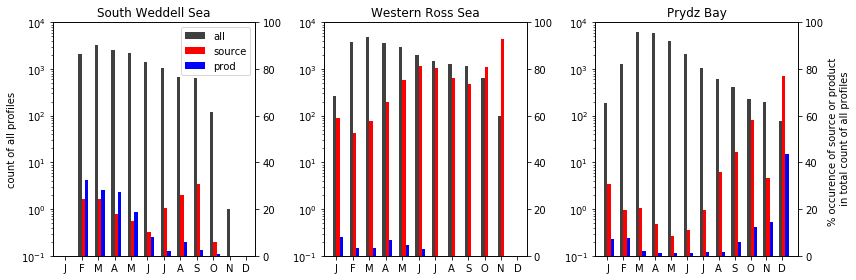

In [51]:
monthCount.plot_counts_profs(dfmg, WSO_source, WSO_prod, 
                             boxes=[Weddell, Ross, Prydz], row=1, col=3, titles=['South Weddell Sea', 
                                                                            'Western Ross Sea', 'Prydz Bay'], 
                            ht=4, save=True, savename='./Images/Hist_regionwise.png')

0 0
0 1


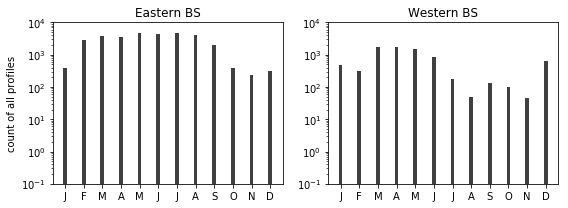

In [237]:
monthCount.plot_counts_profs(dfmg, WSO_source, WSO_prod, 
                             boxes=[EBS, WBS], row=1, col=2, titles=['Eastern BS', 
                                                                            'Western BS'], 
                            wd=8, ht=3, save=True, savename='./Images/Hist_regionwise_BS.png')

0 0


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_monthly_count.py:110: RuntimeWarning: invalid value encountered in true_divide
  rects_source = ax_sp.bar(np.arange(12)+wd, nprof_source/nprof_all*100, wd, color='r', label='source')
/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_monthly_count.py:111: RuntimeWarning: invalid value encountered in true_divide
  rects_prod = ax_sp.bar(np.arange(12)+wd*2, nprof_prod/nprof_all*100, wd, color='b', label='prod')


0 1
0 2


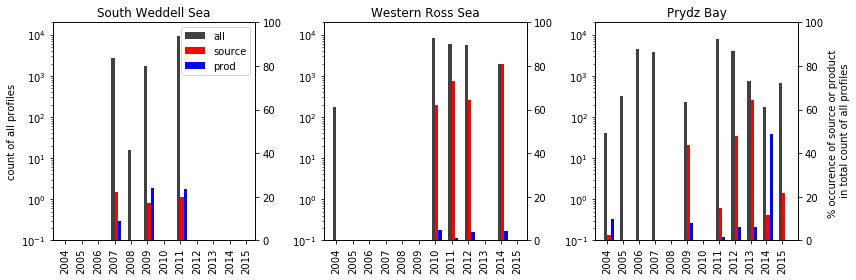

In [53]:
monthCount.plot_yearly_counts_profs(dfmg, WSO_source, WSO_prod, 
                             boxes=[Weddell, Ross, Prydz], row=1, col=3, titles=['South Weddell Sea', 
                                                                            'Western Ross Sea', 'Prydz Bay'], 
                            ht=4, save=True, savename='./Images/Hist_regionwise_yearly.png')

0 0


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_monthly_count.py:110: RuntimeWarning: invalid value encountered in true_divide
  rects_source = ax_sp.bar(np.arange(12)+wd, nprof_source/nprof_all*100, wd, color='r', label='source')
/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/plot_monthly_count.py:111: RuntimeWarning: invalid value encountered in true_divide
  rects_prod = ax_sp.bar(np.arange(12)+wd*2, nprof_prod/nprof_all*100, wd, color='b', label='prod')


0 1


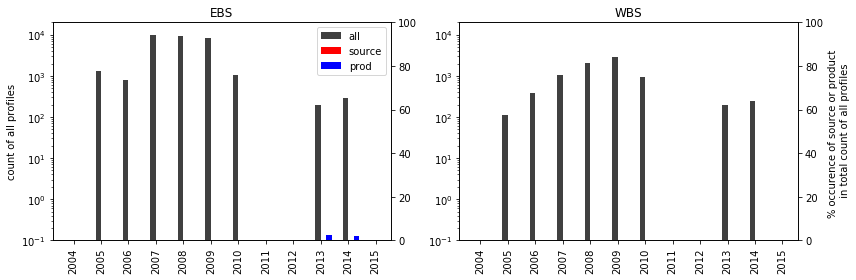

In [54]:
monthCount.plot_yearly_counts_profs(dfmg, WSO_source, WSO_prod, 
                             boxes=[EBS, WBS], row=1, col=2, titles=['EBS', 
                                                                            'WBS'], 
                            ht=4, save=True, savename='./Images/Hist_EBS_WBS_yearly.png')

In [64]:
dfmg.loc[dfmg.groupby('PROFILE_NUMBER').head(1).index, 'DEPTH'].quantile(0.005)

-49.49381637216857

In [24]:
def get_surf_salinity_yearly_mean(df, mask_region=Ross, years=[2010, 2011, 2012, 2014], save=False, 
                                  savename="Untitled.png", layer="Surface"):
    def get_years(df, years=[2010]):
        mask_year = [None] * len(years)
        for i in range(len(years)):
            mask_year[i] = df.loc[:, 'JULD'].dt.year == years[i]
        return mask_year

    mask_years = get_years(df, years=years)
    if(layer=="Bed"):
        mask_layer = dfmg.loc[:, 'mab'] < 100
    elif(layer == "Surface"):
        mask_layer = dfmg.loc[:, 'DEPTH'] > -100
    surf_sal_regional_yearly_mean = np.zeros(len(years))
    sd = np.zeros(len(years))
    n = np.zeros(len(years))
    for i in range(len(years)):
        surf_sal_regional_yearly_mean[i] =  dfmg.loc[mask_region & mask_years[i] & mask_layer, \
                                                     'PSAL_ADJUSTED'].mean()
        sd[i] = dfmg.loc[mask_region & mask_years[i] & mask_layer, \
                                                     'PSAL_ADJUSTED'].std()
        n[i] = dfmg.loc[mask_region & mask_years[i] & mask_layer, \
                                                     'PSAL_ADJUSTED'].count()
        
    fig, ax = plt.subplots(figsize=(7,4))
    yerr = sd
    ax.errorbar(years, surf_sal_regional_yearly_mean, yerr=yerr, capsize=3, fmt="none")
    ax.scatter(years, surf_sal_regional_yearly_mean)
    
    z, res, _, _, _ = np.polyfit(years, surf_sal_regional_yearly_mean, 1, full=True)
    p = np.poly1d(z)
    
    ax.plot(years,p(years),"k--")
    ax.set_xlabel("Years")
    ax.set_ylabel("PSU")
    if(save==True):
        plt.savefig(savename)
    plt.show()
    print("y=%.6fx+(%.6f)"%(z[0],z[1]), "res=",res)
    return surf_sal_regional_yearly_mean, sd, n

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


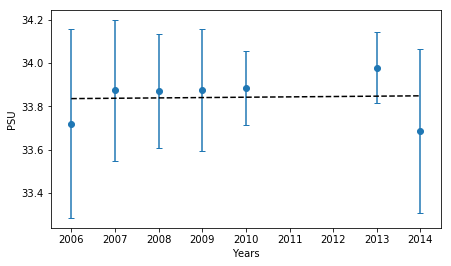

y=0.001610x+(30.605187) res= [ 0.0626362]


(array([ 33.71995616,  33.8735153 ,  33.87091402,  33.87520876,
         33.88460181,  33.9789214 ,  33.685827  ]),
 array([ 0.43628448,  0.32450161,  0.2632528 ,  0.28330982,  0.17266091,
         0.16268624,  0.37779111]),
 array([   7698.,  103028.,   87486.,   78277.,   13722.,    2307.,    3150.]))

In [52]:
get_surf_salinity_yearly_mean(dfmg, mask_region=EBS+WBS, years=np.array([2006, 2007, 2008, 2009, 2010, 2013, 2014]))

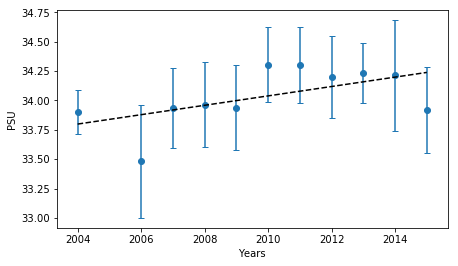

y=0.039973x+(-46.307786) res= [ 0.40769808]


In [40]:
All_surf_sal_yearly_mean, sd, n = get_surf_salinity_yearly_mean(dfmg, mask_region=gline_le_150km,
years=np.array([2004,2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015]))

<IPython.core.display.Javascript object>


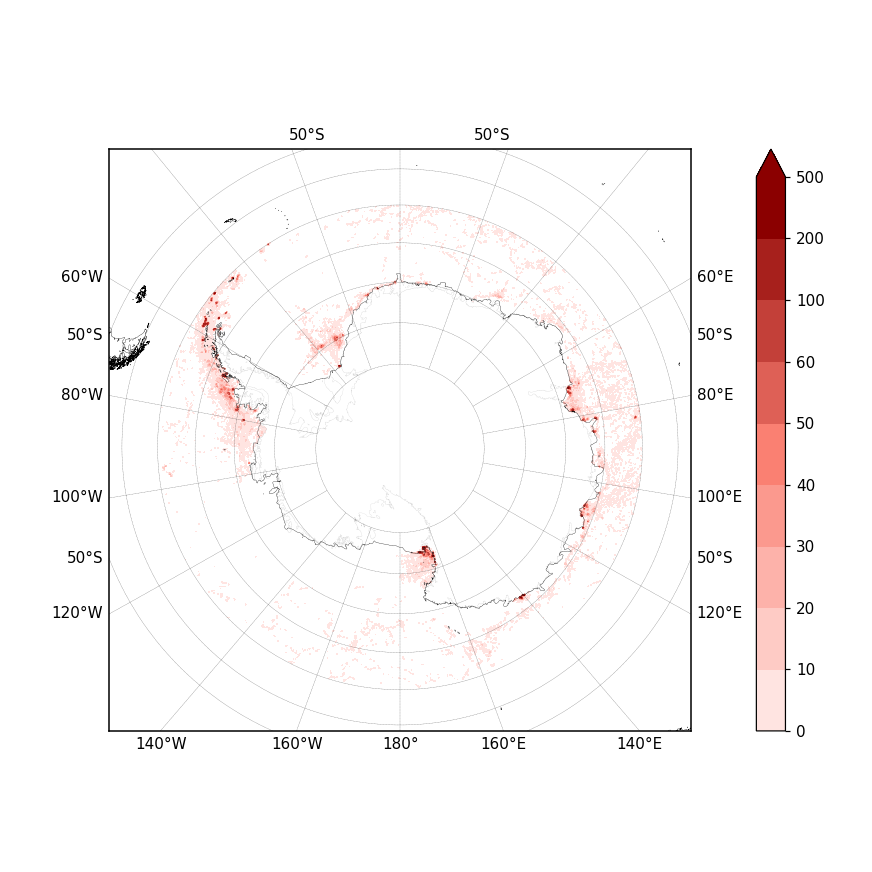

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [26]:
var = 'PSAL_ADJUSTED'
dfno = dfmg.loc[~dfmg.loc[:, var].isnull()]
levels = [0, 10, 20, 30, 40, 50, 60, 100, 200, 500] #, 90, 150, 250, 500, 1000, 2500]
topView.plotDataDensity(dfno, wd=8, ht=8, nx=820, ny=820, levels=levels, 
                        save=False, savename="./Images/dataDensity.png", show=True)

In [538]:
var = 'DEPTH'
dfno = dfmg.loc[lt100 & ~dfmg.loc[:, var].isnull()]
topView.plotDepthOfDive(dfno, wd=8, ht=8, nx=820, ny=820, 
                        nmin=0, save=True, savename='./Images/depthOfDive.png', show=False)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [539]:
var = 'PSAL_ADJUSTED'
mask_source = get_mask_from_prof_mask(dfmg, WSO_source)
dfno = dfmg.loc[mask_source & ~dfmg.loc[:, var].isnull()]
topView.plotBotVarContourf(dfno, var=var, wd=8, ht=8, cmin=34, cmax=35.5, cmap='viridis', region='Whole', 
                           nx=820, ny=820, 
                           save=True, savename='./Images/botContourfSourceWatersBotSal.png', nmin=0, show=False)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [469]:
var = 'PSAL_ADJUSTED'
mask_source = get_mask_from_prof_mask(dfmg, WSO_source)
dfno = dfmg.loc[mask_source & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=33, cmax=35.5, cmap='viridis', region='Whole', 
                            nx=820, ny=820,
                            save=True, savename='./Images/surfContourfSourceWatersSal.png', nmin=0, show=False)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [470]:
var = 'PSAL_ADJUSTED'
mask_months = sel_months(dfmg, [12,1,2,3,4,5])
dfno = dfmg.loc[mask_months & lt100 & ~dfmg.loc[:, var].isnull()]
topView.plotBotVarContourf(dfno, var=var, wd=8, ht=8, cmin=34, cmax=35.5, cmap='viridis', region='Whole', 
                           nx=820, ny=820, 
                           save=True, savename='./Images/botContourfSalDJFMAM.png', nmin=0, show=False)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [471]:
var = 'PSAL_ADJUSTED'
mask_months = sel_months(dfmg, [12,1,2,3,4,5])
dfno = dfmg.loc[WSO_source & mask_months & lt100 & ~dfmg.loc[:, var].isnull()]
topView.plotBotVarContourf(dfno, var=var, wd=8, ht=8, cmin=34, cmax=35.5, cmap='viridis', region='Whole', 
                           nx=820, ny=820,
                           save=True, savename='./Images/botContourfSource_SalDJFMAM.png', nmin=0)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [472]:
var = 'PSAL_ADJUSTED'
mask_months = sel_months(dfmg, [6,7,8,9,10,11])
dfno = dfmg.loc[mask_months & lt100 & ~dfmg.loc[:, var].isnull()]
topView.plotBotVarContourf(dfno, var=var, wd=8, ht=8, cmin=34, cmax=35.5, cmap='viridis', region='Whole', 
                           nx=820, ny=820,
                           save=True, savename='./Images/botContourfSalJJASON.png', nmin=0)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [473]:
var = 'PSAL_ADJUSTED'
mask_months = sel_months(dfmg, [6,7,8,9,10,11])
dfno = dfmg.loc[WSO_source & mask_months & lt100 & ~dfmg.loc[:, var].isnull()]
topView.plotBotVarContourf(dfno, var=var, wd=8, ht=8, cmin=34, cmax=35.5, cmap='viridis', region='Whole', 
                           nx=820, ny=820,
                           save=True, savename='./Images/botContourfSource_SalJJASON.png', nmin=0)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


<IPython.core.display.Javascript object>


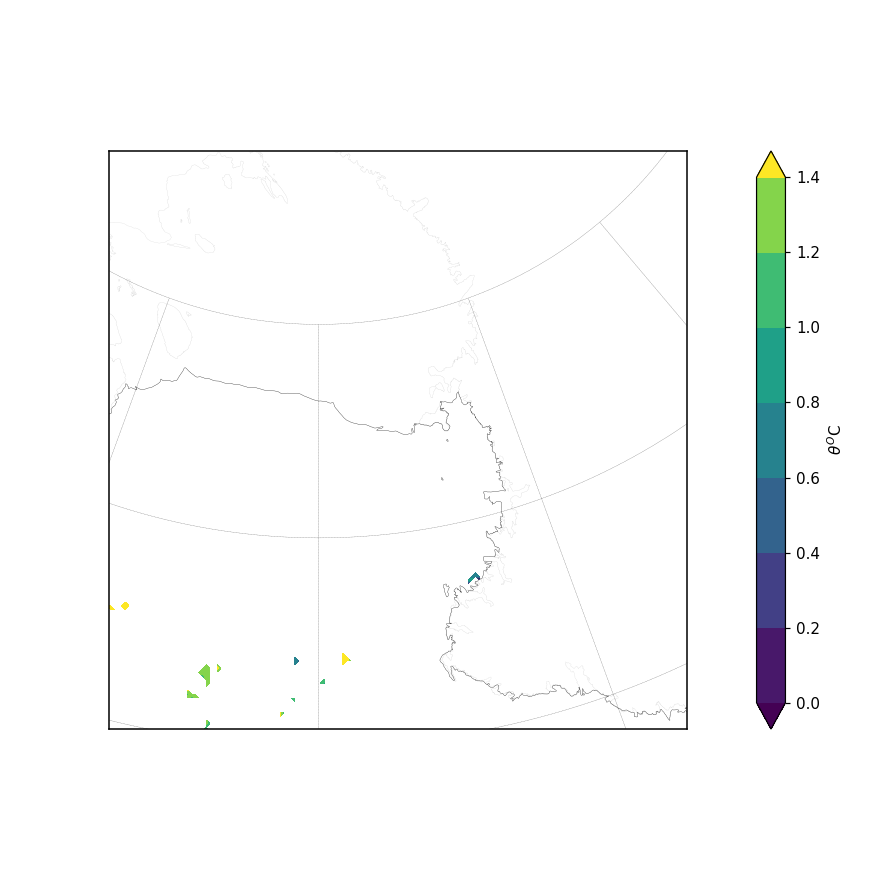

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [25]:
var = 'CTEMP'
mask_cdw = (dfmg.loc[:, 'TEMP_ADJUSTED'] > 0)
dfno = dfmg.loc[mask_cdw & ~dfmg.loc[:, var].isnull()]
topView.plotMaxVarContourf(dfno, var=var, wd=8, ht=8, cmin=0, cmax=1.6, 
                           cmap='viridis', region='Whole', units='$\\theta^O$C', show=True, save=False, 
                           nx=820, ny=820,
                           savename='./Images/max_CDW_ContourfCTemp.png', nmin=0)

In [523]:
var = 'CTEMP'
mask_cdw = (dfmg.loc[:, 'CTEMP'] > 0) & (dfmg.loc[:, 'PSAL_ADJUSTED'] > 34.6)
dfno = dfmg.loc[mask_cdw & ~dfmg.loc[:, var].isnull()]
topView.plotMaxVarContourf(dfno, var=var, wd=8, ht=8, 
                           nx=820, ny=820,
                           cmap='viridis', region='Whole', units='Depth \(m\)', save=True, 
                           savename='./Images/max_CDW_ContourfCTempDepth.png', nmin=0, isvar=False)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [524]:
var = 'CTEMP'
mask_months = sel_months(dfmg, [12,1,2,3,4,5])
dfno = dfmg.loc[mask_months & lt100 & ~dfmg.loc[:, var].isnull()]
topView.plotBotVarContourf(dfno, var=var, wd=8, ht=8, cmin=-2.5, cmax=1.6, 
                           cmap='viridis', region='Whole', units='$\\theta^O$C', save=True, 
                           savename='./Images/botContourfCTempDJFMAM.png', nmin=0)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [477]:
var = 'CTEMP'
mask_months = sel_months(dfmg, [12,1,2,3,4,5])
dfno = dfmg.loc[WSO_source & mask_months & lt100 & ~dfmg.loc[:, var].isnull()]
topView.plotBotVarContourf(dfno, var=var, wd=8, ht=8, cmin=-2.5, cmax=1.6, 
                           cmap='viridis', region='Whole', units='$\\theta^O$C', save=True, 
                           savename='./Images/botContourfSource_CTempDJFMAM.png', nmin=0)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [478]:
var = 'CTEMP'
mask_months = sel_months(dfmg, [6,7,8,9,10,11])
dfno = dfmg.loc[mask_months & lt100 & ~dfmg.loc[:, var].isnull()]
topView.plotBotVarContourf(dfno, var=var, wd=8, ht=8, cmin=-2.5, cmax=1.6, 
                           cmap='viridis', region='Whole', units='$\\theta^O$C', save=True, 
                           savename='./Images/botContourfCTempJJASON.png', nmin=0)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [479]:
var = 'CTEMP'
mask_months = sel_months(dfmg, [6,7,8,9,10,11])
dfno = dfmg.loc[WSO_source & mask_months & lt100 & ~dfmg.loc[:, var].isnull()]
topView.plotBotVarContourf(dfno, var=var, wd=8, ht=8, cmin=-2.5, cmax=1.6, 
                           cmap='viridis', region='Whole', units='$\\theta^O$C', save=True, 
                           savename='./Images/botContourfSource_CTempJJASON.png', nmin=0)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [525]:
var = 'PSAL_ADJUSTED'
mask_months = sel_months(dfmg, [12,1,2,3,4,5])
dfno = dfmg.loc[mask_months & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=33, cmax=35.5, nmin=0, 
                            save=True, savename='./Images/surfContourfSalDJFMAM.png')

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [481]:
var = 'PSAL_ADJUSTED'
mask_months = sel_months(dfmg, [12,1,2,3,4,5])
dfno = dfmg.loc[WSO_source & mask_months & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=33, cmax=35.5, nmin=0, 
                            save=True, savename='./Images/surfContourfSource_SalDJFMAM.png')

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [526]:
var = 'PSAL_ADJUSTED'
mask_months = sel_months(dfmg, [6,7,8,9,10,11])
dfno = dfmg.loc[mask_months & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=33, cmax=35.5, nmin=0, 
                            save=True, savename='./Images/surfContourfSalJJASON.png')

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [483]:
var = 'PSAL_ADJUSTED'
mask_months = sel_months(dfmg, [6,7,8,9,10,11])
dfno = dfmg.loc[WSO_source & mask_months & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=33, cmax=35.5, nmin=0, 
                            save=True, savename='./Images/surfContourfSource_SalJJASON.png')

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [527]:
var = 'CTEMP'
mask_months = sel_months(dfmg, [12,1,2,3,4,5])
dfno = dfmg.loc[mask_months & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=-2.5, cmax=1.6, nmin=0, units='$\\theta^o$C',
                            save=True, savename='./Images/surfContourfCTempDJFMAM.png')

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [485]:
var = 'CTEMP'
mask_months = sel_months(dfmg, [12,1,2,3,4,5])
dfno = dfmg.loc[WSO_source & mask_months & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=-2.5, cmax=1.6, nmin=0, units='$\\theta^o$C',
                            save=True, savename='./Images/surfContourfSource_CTempDJFMAM.png')

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [528]:
var = 'CTEMP'
mask_months = sel_months(dfmg, [6,7,8,9,10,11])
dfno = dfmg.loc[mask_months & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=-2.5, cmax=1.6, nmin=0, units='$\\theta^o$C',
                            save=True, savename='./Images/surfContourfCTempJJASON.png')

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [487]:
var = 'CTEMP'
mask_months = sel_months(dfmg, [6,7,8,9,10,11])
dfno = dfmg.loc[WSO_source & mask_months & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=-2.5, cmax=1.6, nmin=0, units='$\\theta^o$C',
                            save=True, savename='./Images/surfContourfSource_CTempJJASON.png')

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [529]:
def quarterly_topViewPlot(df, region='Whole', funName=topView.plotSurfVarContourf, 
                          var='PSAL_ADJUSTED', cmin=33, cmax=35.5, units='Cond.', 
                          nmin=0, save=False, savename='untitled.png'):
    quarters = [[12,1,2], [3,4,5], [6,7,8], [9,10,11]]
    quarters_names = ['DJF', 'MAM', 'JJA', 'SON']
    
    for i in range(len(quarters)):
        mask_months = sel_months(df, quarters[i])
        dfno = df.loc[mask_months & ~df[var].isnull()]
        print(quarters_names[i])
        
        funName(dfno, var=var, wd=8, ht=8, cmin=cmin, cmax=cmax, nmin=nmin, units=units, 
                save=save, savename=savename+quarters_names[i]+'.png')

In [530]:
quarterly_topViewPlot(dfmg[lt100], funName=topView.plotBotVarContourf, 
                      save=True, savename='./Images/botContourfSal_', cmin=34)

DJF


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


MAM
JJA
SON


In [531]:
quarterly_topViewPlot(dfmg[WSO_source & lt100], funName=topView.plotBotVarContourf, 
                      save=True, savename='./Images/botContourfSource_Sal_', cmin=34)

DJF


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


MAM
JJA
SON


In [532]:
quarterly_topViewPlot(dfmg, funName=topView.plotSurfVarContourf, save=True, savename='./Images/surfContourfSal_', 
                     nmin=0)

DJF


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


MAM
JJA
SON


In [492]:
quarterly_topViewPlot(dfmg[WSO_source], funName=topView.plotSurfVarContourf, save=True, 
                      savename='./Images/surfContourfSource_Sal_', nmin=0)

DJF


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


MAM
JJA
SON


In [533]:
quarterly_topViewPlot(dfmg, var='CTEMP', cmin=-2.5, cmax=1.6, 
                      nmin=0, units='$\\theta^O$C', funName=topView.plotBotVarContourf, 
                      save=True, savename='./Images/botContourfCTemp_')

DJF


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


MAM
JJA
SON


In [494]:
quarterly_topViewPlot(dfmg[WSO_source], var='CTEMP', cmin=-2.5, cmax=1.6, 
                      nmin=0, units='$\\theta^O$C', funName=topView.plotBotVarContourf, 
                      save=True, savename='./Images/botContourfSource_CTemp_')

DJF


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


MAM
JJA
SON


In [534]:
quarterly_topViewPlot(dfmg, var='CTEMP', cmin=-2.5, cmax=1.6, nmin=0, units='$\\theta^O$C', 
                      save=True, savename='./Images/surfContourfCTemp_')

DJF


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


MAM
JJA
SON


In [496]:
quarterly_topViewPlot(dfmg[WSO_source], var='CTEMP', cmin=-2.5, cmax=1.6, nmin=0, units='$\\theta^O$C', 
                      save=True, savename='./Images/surfContourfSource_CTemp_')

DJF


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


MAM
JJA
SON


In [238]:
def plot_regional_averagedProfiles(df, region, save=False, savename='Untitled.png', errorevery=4, cutoff_depth=0, 
                                   min_n=50, period='quarter', sigvline=[0,0] ):
    months_quarters = np.array([[12,1,2], [3,4,5], [6,7,8], [9,10,11]])
    months_half = np.array([[12,1,2,3,4,5], [6,7,8,9,10,11,12]])
    
    mth_qt_names = ['DJF', 'MAM', 'JJA', 'SON']
    mth_half_names = ['DJFMAM', 'JJASON']
    mth_each_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    if(period=='quarter'):
        months = months_quarters
        month_names = mth_qt_names
    elif(period=='half'):
        months= months_half
        month_names = mth_half_names
    elif(period == 'month'):
        months = np.arange(1,13,1)
        month_names = mth_each_names
    else:
        raise valueError(' \'period\' should be either \'quarter\' or \'half\' ')
        
    for i in range(len(months)):
        mask_months = sel_months(df, months[i])
        mask = get_mask_from_prof_mask(df, (region & mask_months) )
        print('Months:',month_names[i],'len=',len(dfmg.loc[mask, 'PROFILE_NUMBER'].unique()))
        averageProfile.find_depth_averages_v2(df[mask], sigvline=sigvline, tmin=-2.35, tmax=0.5, salmin=33.8,
                                              salmax=35., sigmin=27., sigmax=28.2, save=save, 
                                              savename=savename+month_names[i]+'.png', 
                                              use_sample_sd=True, use_full_sd=False, errorevery=errorevery, 
                                              maskerror=False, 
                                              markersize='3', depth_bins=10, cutoff_depth=cutoff_depth, min_n=min_n)

In [15]:
importlib.reload(averageProfile)

<module 'find_depth_averages_v2' from '/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py'>

Months: Jan len= 0


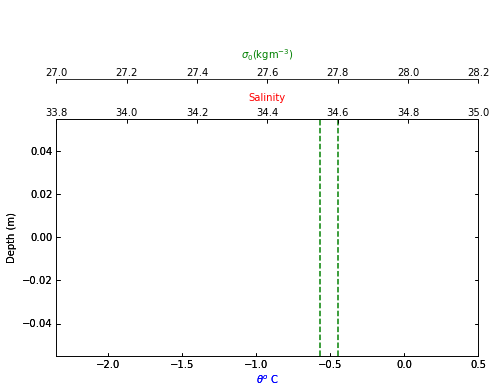

Months: Feb len= 2079


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py:38: RuntimeWarning: invalid value encountered in less
  xerror = ma.array(xerror, mask=(xerror < 0))


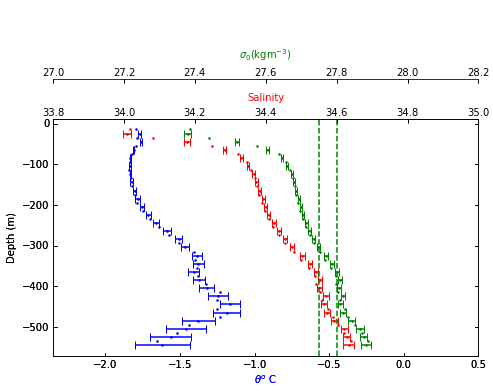

Months: Mar len= 3255


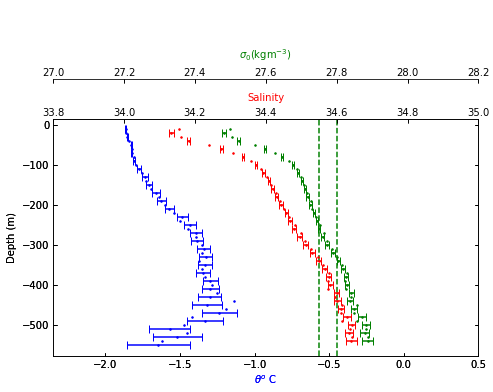

Months: Apr len= 2584


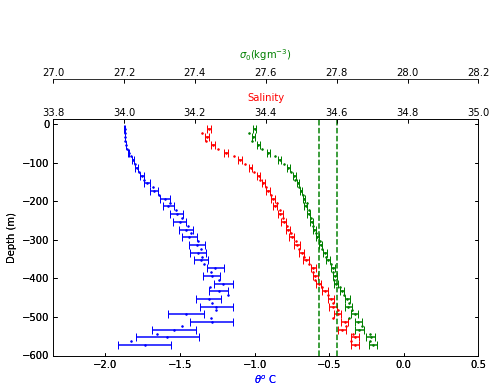

Months: May len= 2236


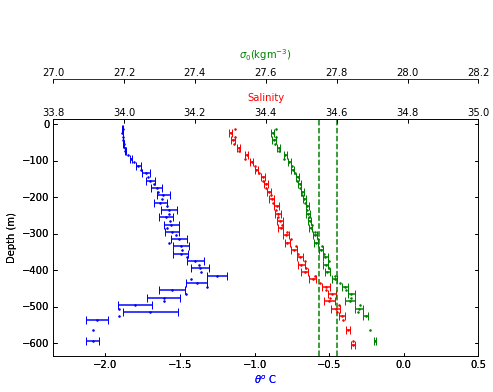

Months: Jun len= 1431


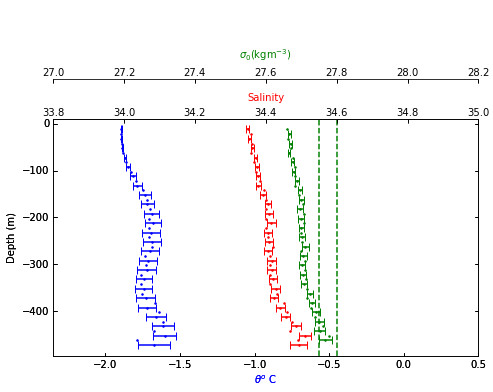

Months: Jul len= 1045


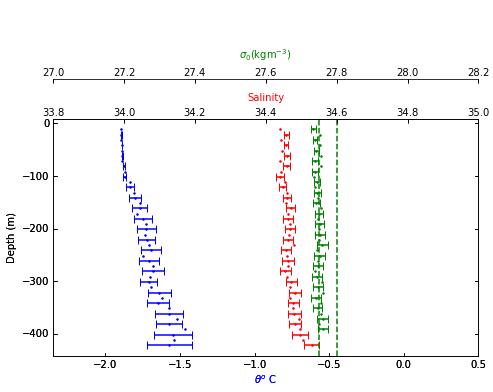

Months: Aug len= 691


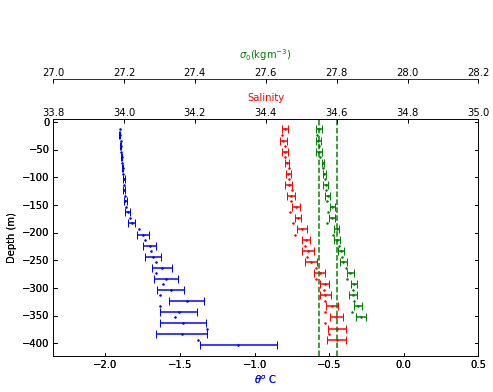

Months: Sep len= 655


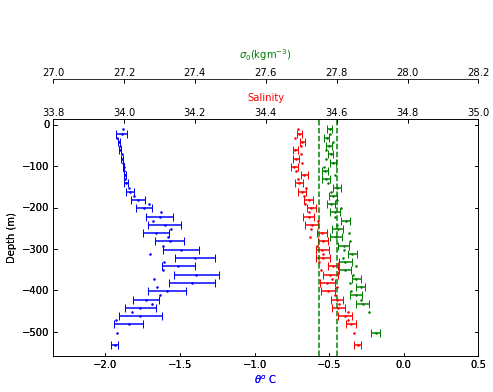

Months: Oct len= 120


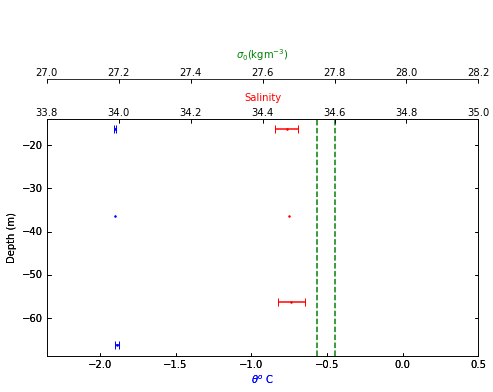

Months: Nov len= 1


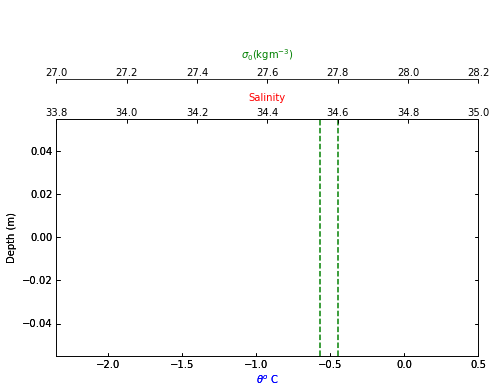

Months: Dec len= 0


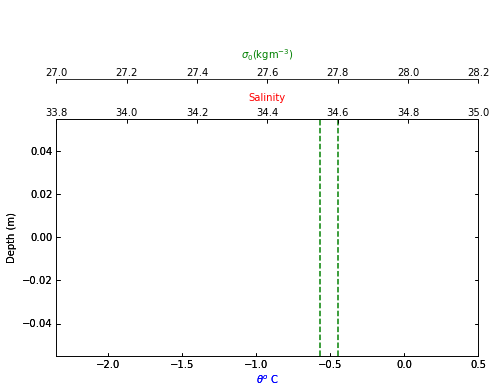

In [239]:
plot_regional_averagedProfiles(dfmg, Weddell, save=True, savename='./Images/prof_avg_Weddell_all_', errorevery=2, 
                               min_n=50, period='month', sigvline=[27.75, 27.8])

Months: Jan len= 265


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py:38: RuntimeWarning: invalid value encountered in less
  xerror = ma.array(xerror, mask=(xerror < 0))


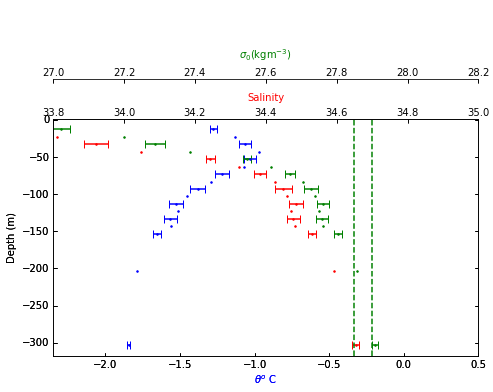

Months: Feb len= 3732


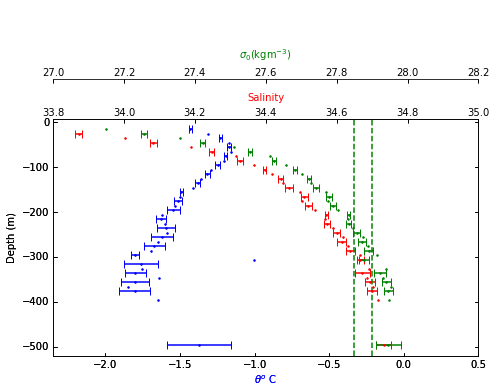

Months: Mar len= 4971


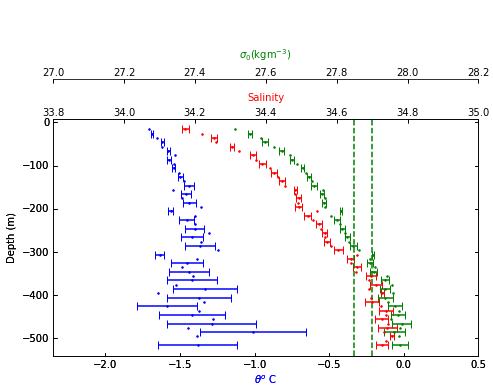

Months: Apr len= 3657


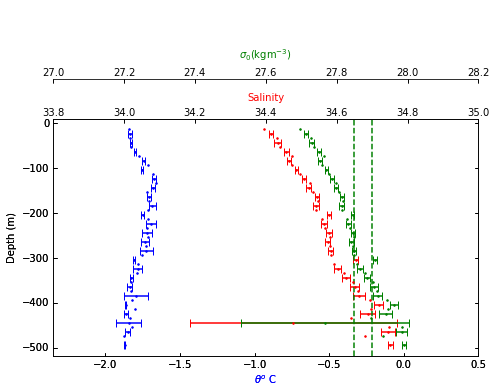

Months: May len= 3025


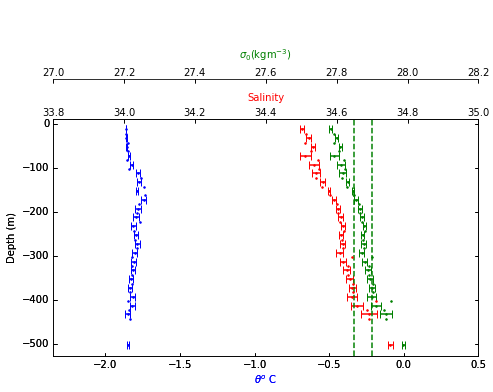

Months: Jun len= 2020


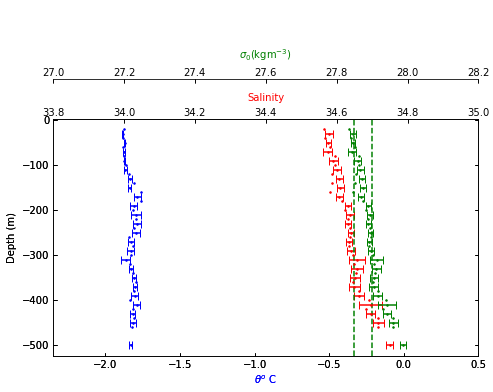

Months: Jul len= 1455


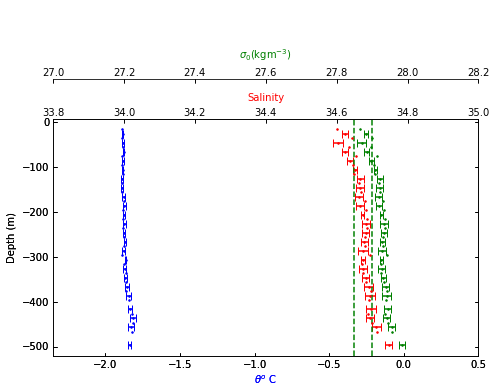

Months: Aug len= 1259


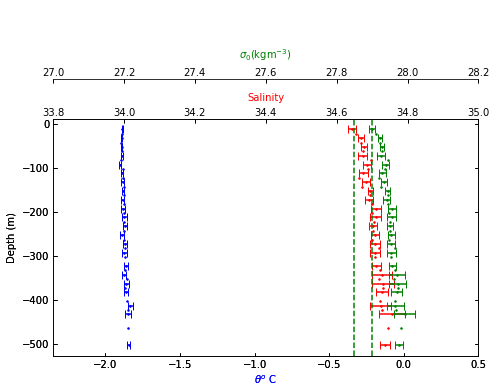

Months: Sep len= 1148


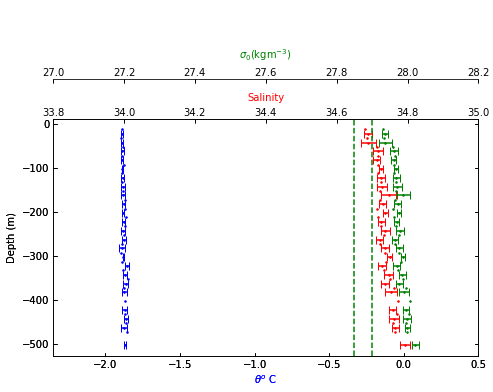

Months: Oct len= 643


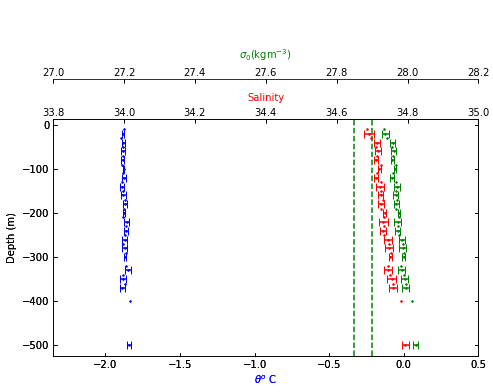

Months: Nov len= 97


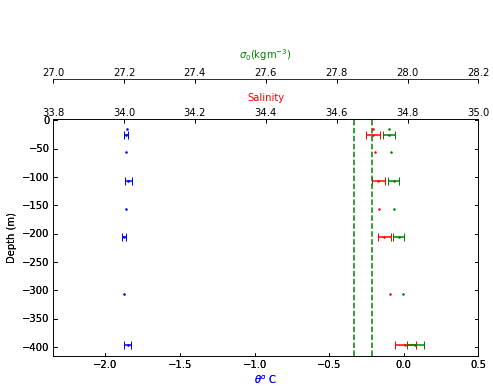

Months: Dec len= 0


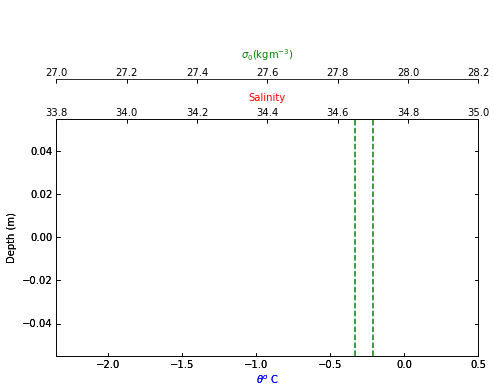

In [240]:
plot_regional_averagedProfiles(dfmg, Ross, save=True, savename='./Images/prof_avg_Ross_all_', errorevery=2, 
                               min_n=50, period='month', sigvline=[27.9, 27.85])

Months: Jan len= 189


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py:38: RuntimeWarning: invalid value encountered in less
  xerror = ma.array(xerror, mask=(xerror < 0))


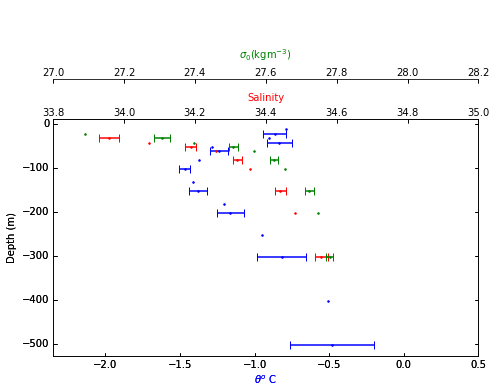

Months: Feb len= 1316


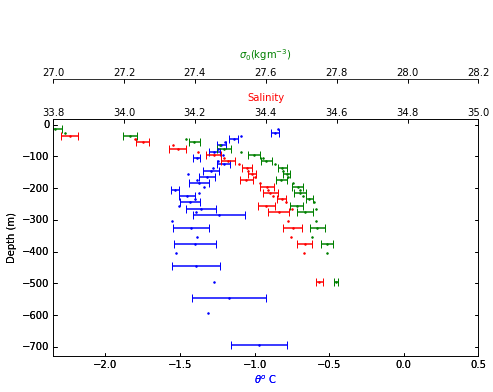

Months: Mar len= 6260


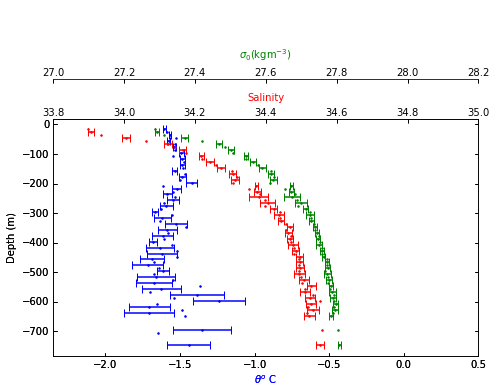

Months: Apr len= 6062


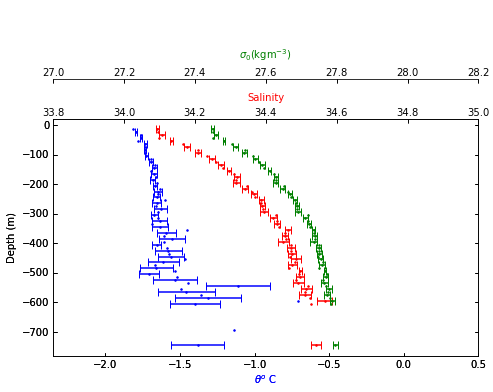

Months: May len= 3922


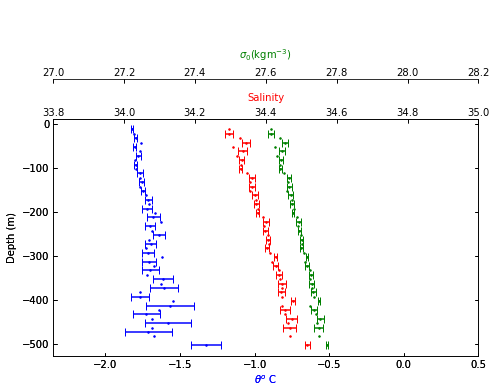

Months: Jun len= 2138


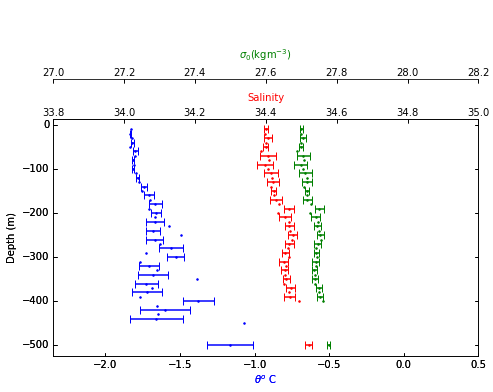

Months: Jul len= 1050


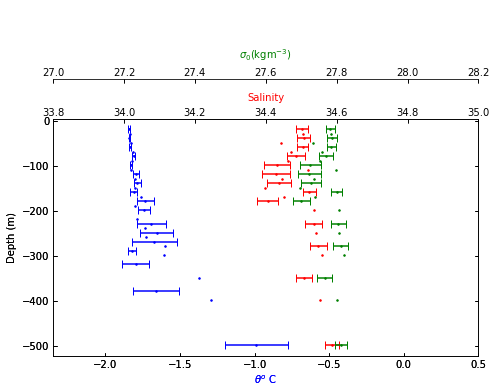

Months: Aug len= 601


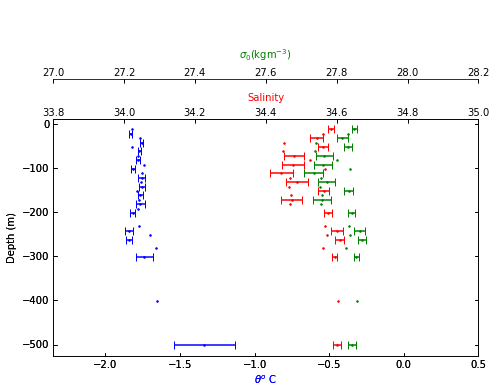

Months: Sep len= 410


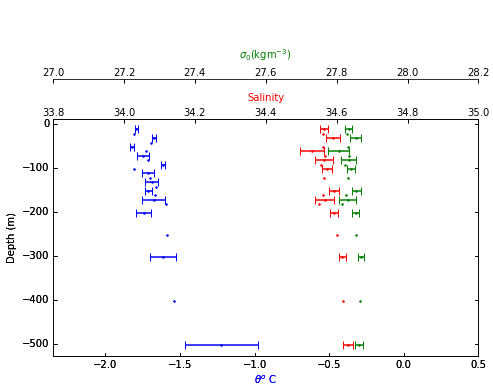

Months: Oct len= 224


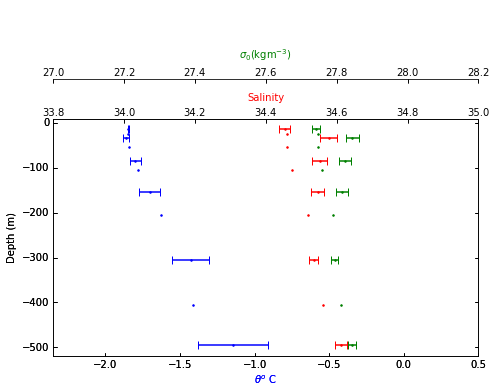

Months: Nov len= 195


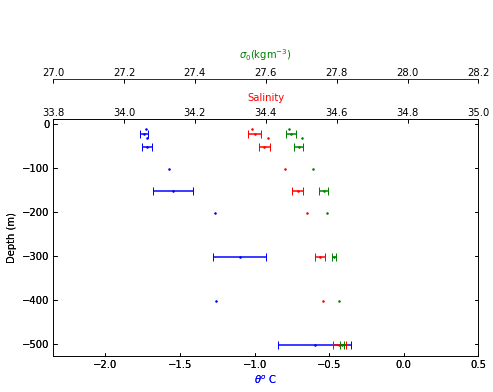

Months: Dec len= 78


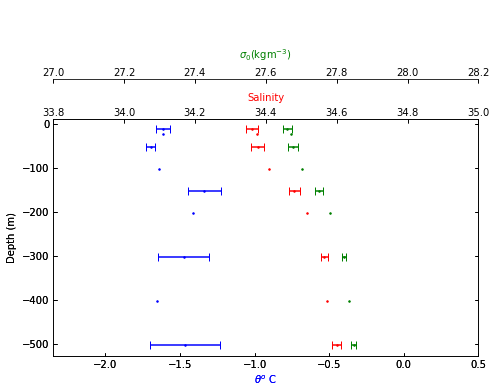

In [241]:
plot_regional_averagedProfiles(dfmg, Prydz, save=True, savename='./Images/prof_avg_Prydz_all_', errorevery=2, 
                               min_n=50, period='month', sigvline=[0, 0])

Months: DJFMAM len= 10154


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py:38: RuntimeWarning: invalid value encountered in less
  xerror = ma.array(xerror, mask=(xerror < 0))


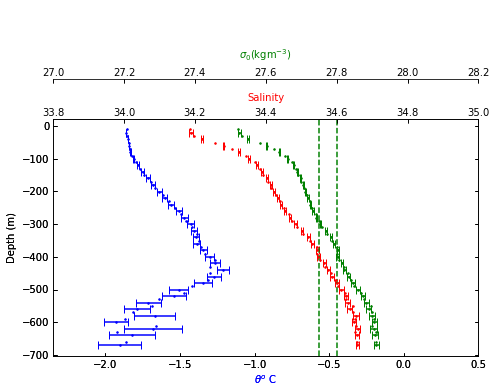

Months: JJASON len= 3943


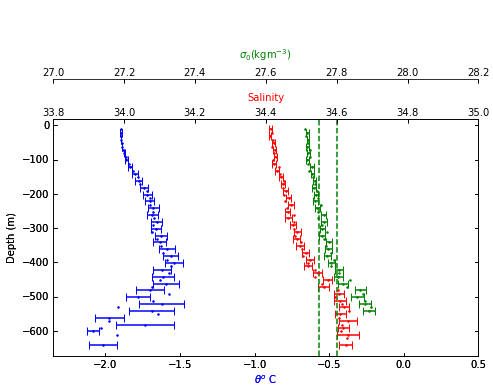

In [220]:
plot_regional_averagedProfiles(dfmg, Weddell, save=True, savename='./Images/prof_avg_Weddell_all_', errorevery=2, 
                               min_n=50, period='half', sigvline=[27.75, 27.8])

Months: DJF len= 2079


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py:38: RuntimeWarning: invalid value encountered in less
  xerror = ma.array(xerror, mask=(xerror < 0))


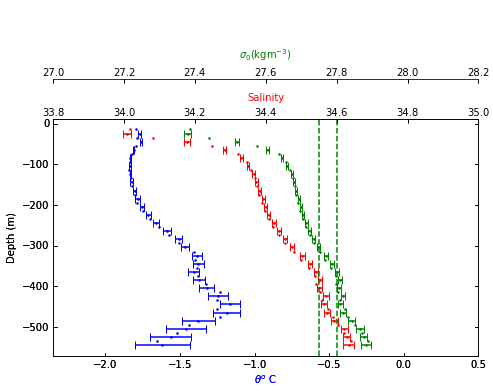

Months: MAM len= 8075


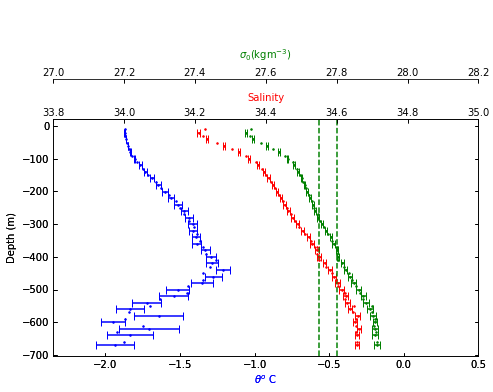

Months: JJA len= 3167


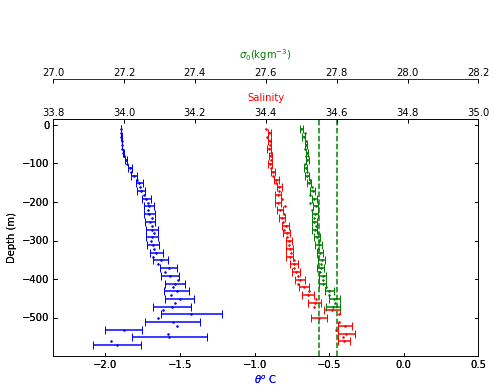

Months: SON len= 776


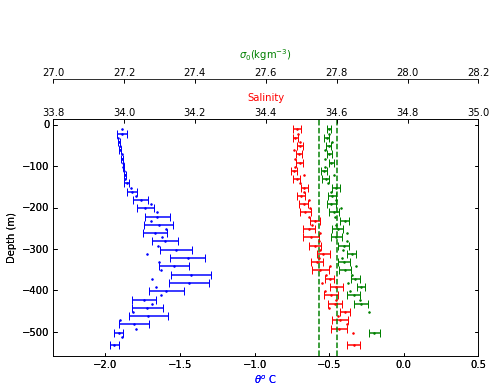

In [89]:
plot_regional_averagedProfiles(dfmg, Weddell, save=True, savename='./Images/prof_avg_Weddell_all_', errorevery=2, 
                               min_n=50, period='quarter')

Months: DJFMAM len= 15650


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py:38: RuntimeWarning: invalid value encountered in less
  xerror = ma.array(xerror, mask=(xerror < 0))


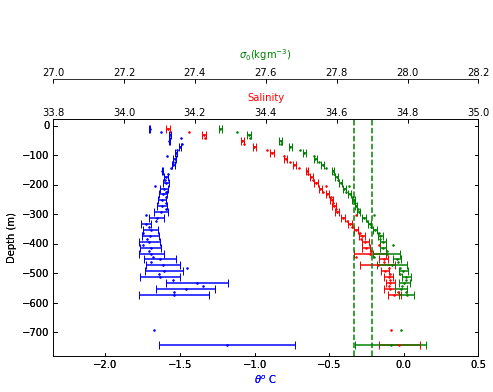

Months: JJASON len= 6622


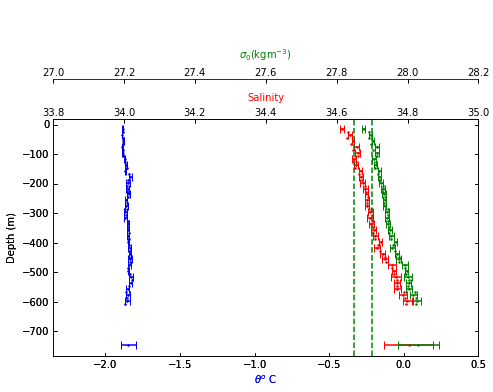

In [100]:
plot_regional_averagedProfiles(dfmg, Ross, save=True, savename='./Images/prof_avg_Ross_all_', errorevery=2, 
                               min_n=50, period='half', sigvline=[27.9,27.85])

Months: DJF len= 3997


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py:38: RuntimeWarning: invalid value encountered in less
  xerror = ma.array(xerror, mask=(xerror < 0))


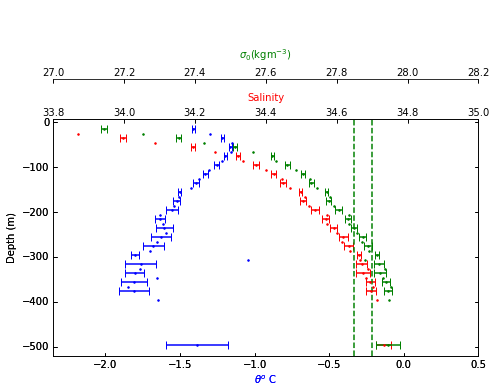

Months: MAM len= 11653


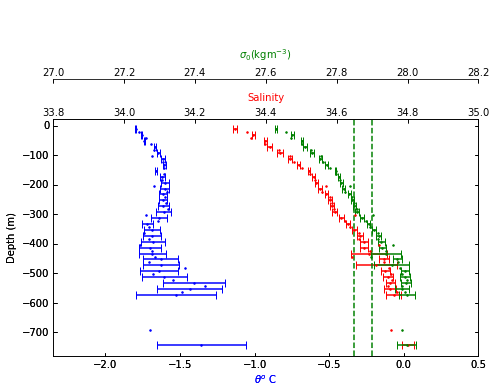

Months: JJA len= 4734


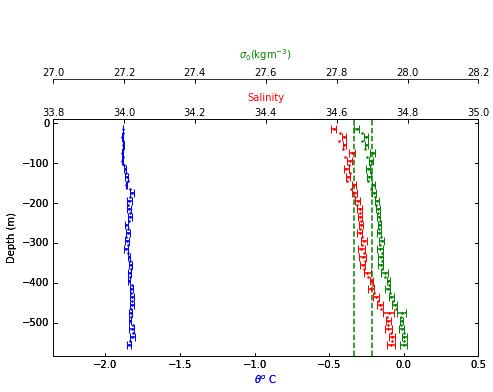

Months: SON len= 1888


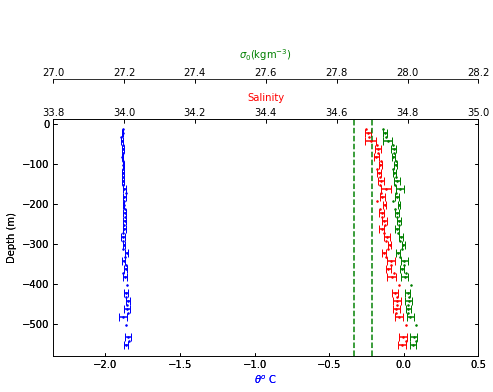

In [101]:
plot_regional_averagedProfiles(dfmg, Ross, save=True, savename='./Images/prof_avg_Ross_all_', errorevery=2, 
                               min_n=50, period='quarter', sigvline=[27.9, 27.85])

Months: DJFMAM len= 17827


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py:38: RuntimeWarning: invalid value encountered in less
  xerror = ma.array(xerror, mask=(xerror < 0))


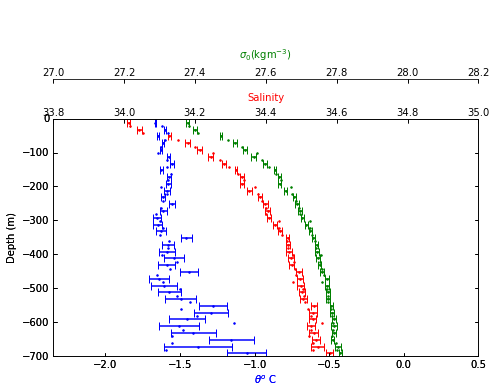

Months: JJASON len= 4696


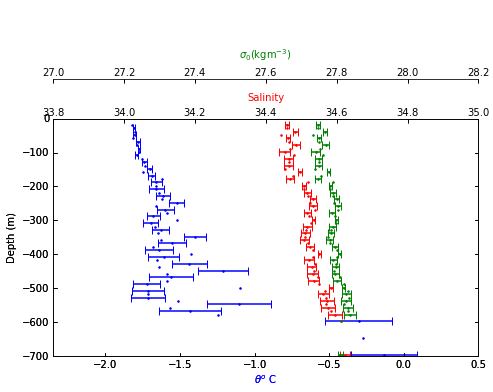

In [102]:
plot_regional_averagedProfiles(dfmg, Prydz, save=True, savename='./Images/prof_avg_Prydz_all_', cutoff_depth=-700, 
                               min_n=50, errorevery=2, period='half', sigvline=[0,0])

Months: DJF len= 1583


/media/data/Datasets/MEOP/MEOP-CTD_2016-07-12/UK/myScripts/find_depth_averages_v2.py:38: RuntimeWarning: invalid value encountered in less
  xerror = ma.array(xerror, mask=(xerror < 0))


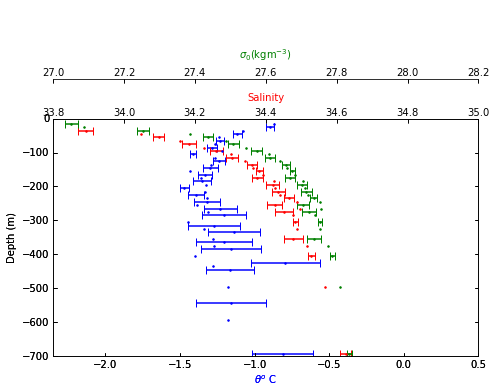

Months: MAM len= 16244


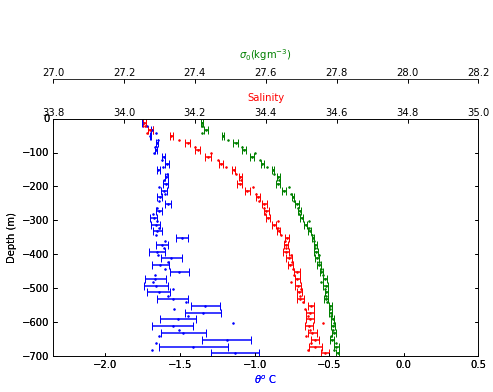

Months: JJA len= 3789


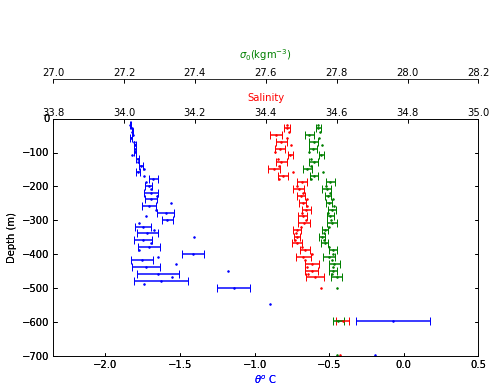

Months: SON len= 829


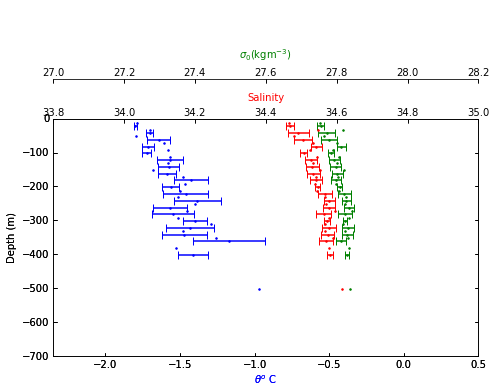

In [103]:
plot_regional_averagedProfiles(dfmg, Prydz, save=True, savename='./Images/prof_avg_Prydz_all_', cutoff_depth=-700, 
                               min_n=50, errorevery=2, sigvline=[0,0])

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


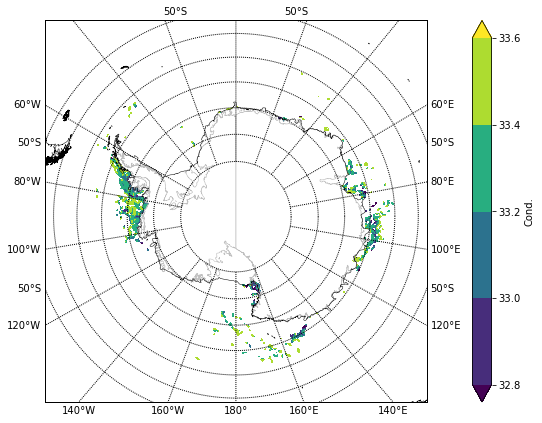

In [35]:
var = 'PSAL_ADJUSTED'
dfno = dfmg.loc[ lowSurfSal & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=32.8, cmax=33.6, nmin=0, 
                            save=True, savename='./Images/surfContourfLowSurfSal.png')

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


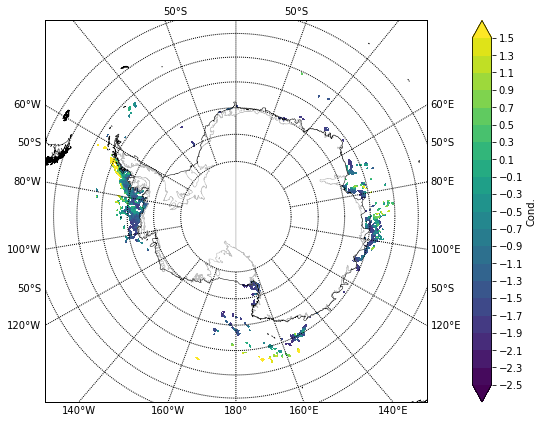

In [36]:
var = 'CTEMP'
dfno = dfmg.loc[ lowSurfSal & ~dfmg.loc[:, var].isnull()]
topView.plotSurfVarContourf(dfno, var=var, wd=8, ht=8, cmin=-2.5, cmax=1.6, nmin=0, 
                            save=True, savename='./Images/surfContourfLowSurfSalCTemp.png')

In [41]:
lowSal = dfmg.groupby('PROFILE_NUMBER')['PSAL_ADJUSTED'].transform(min) == dfmg['PSAL_ADJUSTED']
#dfmg['DEPTH'] = abs(dfmg['DEPTH'])
dfmg.loc[lowSal , 'DEPTH'].describe()

count    186959.000000
mean        -34.721904
std          51.700229
min       -1087.580325
25%         -49.490989
50%         -16.821010
75%          -5.942755
max          -1.980414
Name: DEPTH, dtype: float64

In [40]:
dfmg['DEPTH'] = -dfmg['DEPTH']